In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/content/Healthcare-Diabetes.csv')
data.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

In [23]:
data = data.dropna()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [26]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42,criterion="entropy")
dt_classifier.fit(X_train, y_train)
feature_importances = dt_classifier.feature_importances_
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200,random_state=42,criterion="entropy")
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted')

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

accuracy = knn.score(X_test, y_test)
print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.6624548736462094


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
pred = logreg_model.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
from sklearn.ensemble import StackingClassifier
estimators = [('dt', dt_classifier), ('rf', rf_classifier), ('knn', knn)]
stacked_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacked_model.fit(X_train, y_train)
stacked_predictions = stacked_model.predict(X_test)


In [47]:
from sklearn.preprocessing import PolynomialFeatures
degree =2
poly_features = PolynomialFeatures(degree=degree)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression

multi_linear_model = LinearRegression()
multi_linear_model.fit(X_train, y_train)
pred = multi_linear_model.predict(X_train)
score = r2_score(y_train, pred)

In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
print('Number of mislabeled points out of a total %d points : %d' % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 554 points : 187


In [40]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(x, y)

SVC(kernel='linear')

In [49]:
predictions = model.predict(x)
accuracy = model.score(x, y)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 0.770592485549133


In [50]:
print(f'R2 Score: {score}')
print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree F1 Score:", dt_f1_score)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)

R2 Score: 0.8102255057399625
Decision Tree Accuracy: 0.6624548736462094
Decision Tree F1 Score: 0.5279499210166315

Random Forest Accuracy: 0.6624548736462094
Random Forest F1 Score: 0.5279499210166315


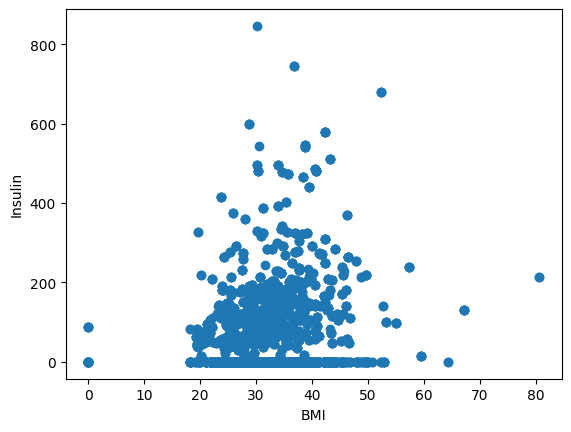

In [51]:
plt.scatter(data['BMI'],data['Insulin'])
plt.xlabel('BMI')
plt.ylabel('Insulin')
plt.show()

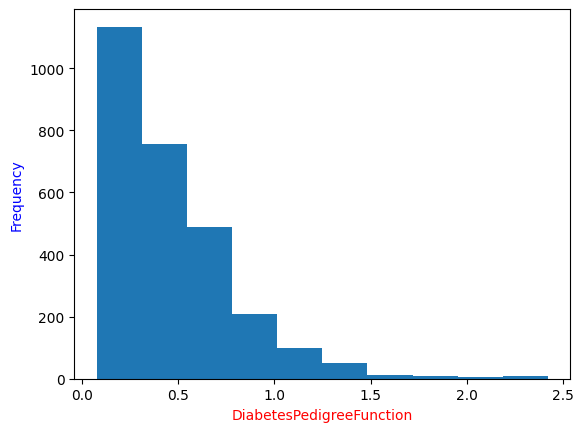

In [52]:
plt.hist(data['DiabetesPedigreeFunction'])
plt.xlabel('DiabetesPedigreeFunction', color='red')
plt.ylabel('Frequency', color='blue')
plt.show()

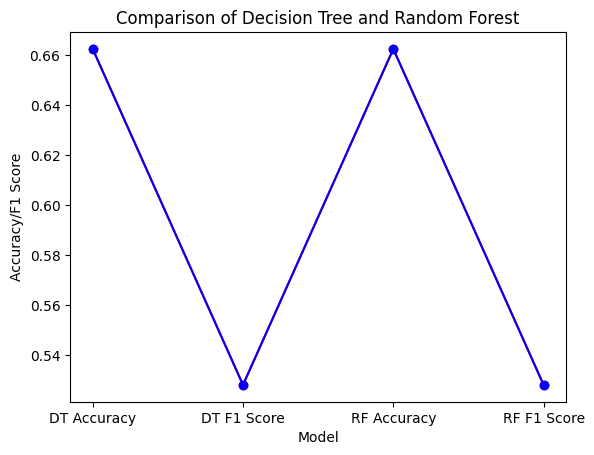

In [53]:

x_values = ["DT Accuracy","DT F1 Score", "RF Accuracy","RF F1 Score"]
y_values = [dt_accuracy, dt_f1_score, rf_accuracy, rf_f1_score]
colors = ["red", "blue"]
colors = list(colors)
plt.plot(x_values, y_values, '-o',color=colors[0])
plt.plot(y_values, '-o', color=colors[1])
plt.xlabel("Model")
plt.ylabel("Accuracy/F1 Score")
plt.title("Comparison of Decision Tree and Random Forest")
plt.show()